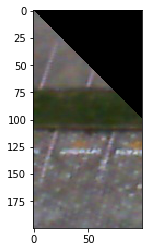

In [1]:
import cv2
import pymysql
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure import compare_ssim

%matplotlib inline


def connect_db(sql,action):

    r=[]
    
    if action == "u":
        cursor.execute(sql)
        db.commit()
    if action == "s":
        cursor.execute(sql)
        results = cursor.fetchall()
        for row in results:
            r.append(row)
        return r

def obtain_pklots(entry,coords,coordsY,coordsX):
    masks = []
    img = entry
    for i in range(len(coords)):
        ROI_corners = np.array([coords[i].tolist()], dtype=np.int32) 
        mask = np.zeros(img.shape, dtype=np.uint8)

        channel_count = img.shape[2]  
        ignore_mask_color = (255,)*channel_count
        cv2.fillPoly(mask, ROI_corners, ignore_mask_color)
        masked_image = cv2.bitwise_and(img, mask)
        masked_image = masked_image[np.min(coordsY[i]):np.max(coordsY[i]),np.min(coordsX[i]):np.max(coordsX[i])]
        masks.append(masked_image)

img = cv2.imread('new.jpg',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

db = pymysql.connect("localhost","sebRM","sebrm","Rumbomobile")
cursor = db.cursor()

sql = "SELECT * FROM pklot2"
data = connect_db(sql,"s")

coordsX=[]
b=[coordsX.append(data[i][1].split(",")) for i in range(len(data))]
coordsY=[]
b=[coordsY.append(data[i][2].split(",")) for i in range(len(data))]

coordsX = np.float32(coordsX)
coordsY = np.float32(coordsY)
coords = np.zeros(coordsX.shape,dtype = tuple)
coords_mag = np.sqrt(coordsX**2 + coordsY**2)
coords_mag.sort()
minmag = coords_mag[:,0]
maxmag = coords_mag[:,3]
for i in range(len(coordsX)):
    k = 1
    for j in range(len(coordsX[1])):
        
        if (np.abs(np.sqrt(coordsX[i][j]**2 + coordsY[i][j]**2) - minmag[i]) <=0.01):
            coords[i][0]=(coordsX[i][j],coordsY[i][j])
        elif (np.abs(np.sqrt(coordsX[i][j]**2 + coordsY[i][j]**2) - maxmag[i]) <=0.01):
            coords[i][2]=(coordsX[i][j],coordsY[i][j])
        else:
            coords[i][k]=(coordsX[i][j],coordsY[i][j])
            k = k + 2
        
            
coords.tolist();
coordsX = np.uint16(coordsX)
coordsY = np.uint16(coordsY)
